# Desafio Naive Bayes

## 1. Librerías

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, classification_report

import os
import glob

import warnings

warnings.filterwarnings(action='ignore')
plt.style.use('seaborn')                
plt.rcParams['figure.figsize'] = (10,20)  

In [57]:
dire = os.getcwd()+'\dump'

In [58]:
df = pd.concat(map(pd.read_csv, glob.glob(dire+'/*.csv')))

In [59]:
df.drop(labels='Unnamed: 0',axis=1,inplace=True)

In [60]:
columns_name={'0': 'artist',
       '1': 'genre',
       '2':'song',
       '3':'lyrics'}

In [61]:
df.rename(columns = columns_name, inplace=True)

In [82]:
df.sample(10)

,artist,genre,song,lyrics
73,Eminem,hiphop,3 Verses,I'm the illest rapper to hold a cordless \n Pa...
107,Public Enemy,hiphop,Swindlers Lust,A dollar a rhyme but we barely get a dime \n I...
59,Ghostface Killah,hiphop,Tush,(Intro: Missy Elliott) \n Ooh... This that fir...
120,Public Enemy,hiphop,Bring That Beat Back,Played in Cincinnati \n Wit my whole head napp...
78,Radiohead,rock,Where I End And You Begin. (The Sky Is Falling...,There's a gap in between \n There's a gap wher...
477,Eminem,hiphop,We On Fire( Ja Diss),(50 Cent) \n Hahahaha \n G G G G G G G G-Unit ...
165,Red Hot Chili Peppers,rock,Turn It Again,Some of us get a little and some a lot \n We'v...
37,Britney Spears,pop,Let Me Be,You try to read me \n You try to figure out \n...
162,De La Soul,hiphop,Buddy (Remix),"Dove: \n Meany, meany, meany, meany, meany (Sa..."
148,The Doors,rock,Black Train Song,People get ready \n There's a train-a-coming \...


## 2. Descripción de los datos

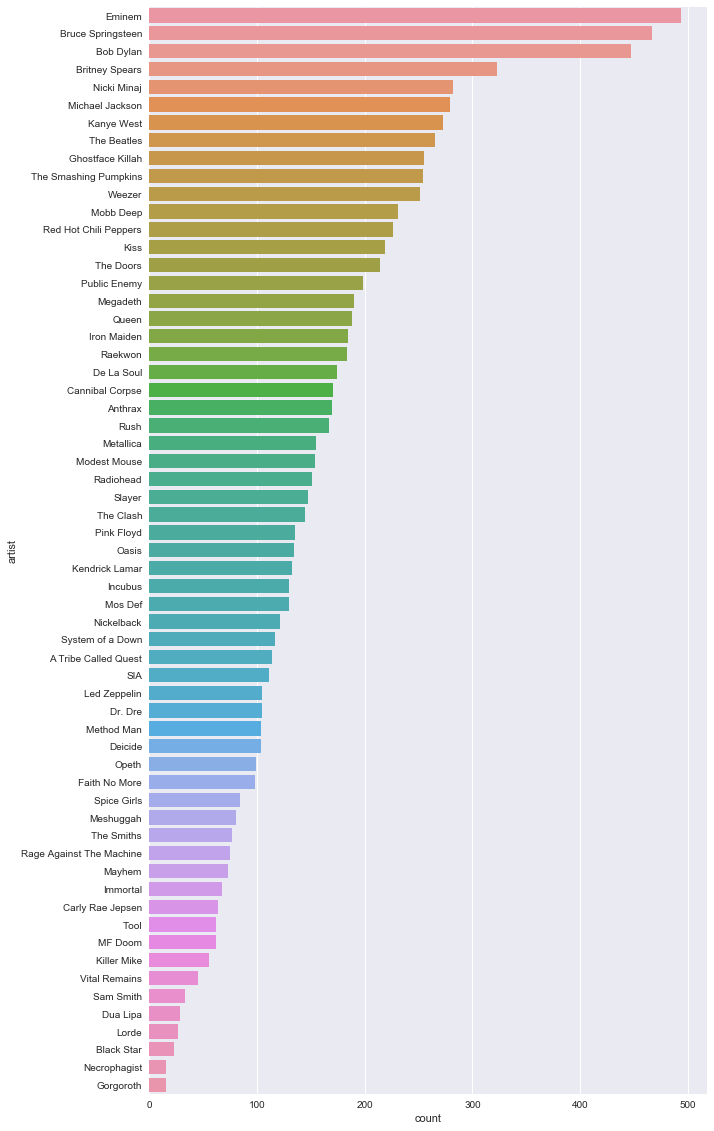

In [66]:
sns.countplot(y=df['artist'],order=df['artist'].value_counts().index)

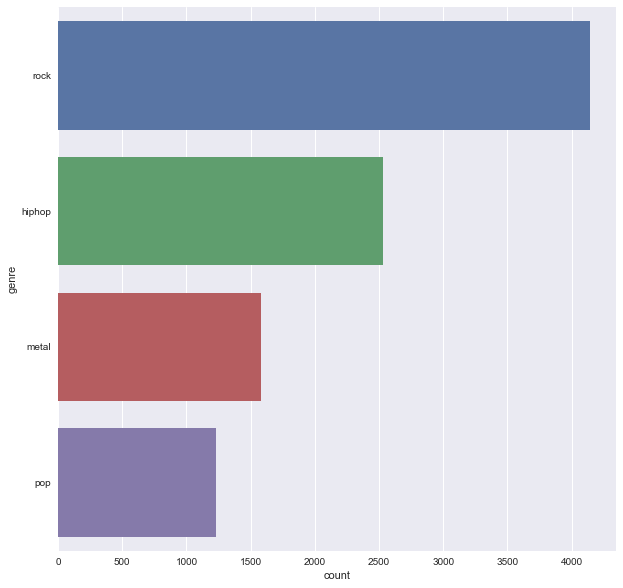

In [67]:
plt.figure(figsize=(10,10))
sns.countplot(y=df['genre'],order=df['genre'].value_counts().index)

Se puede observar que en el gráfico de artistas, que posee este dataset, que los que más han escrito canciones son cantantes de pop y hip hop, entre ellos: Eminem, Britney Spear y Michael Jackson, sin embargo, al considerar el genero y el número de canciones escritas, son los artistas de rock los que tienen una mayor cantidad de canciones en esta base de datos.

Lo anterior implica que para esta muestra, el número total de canciones de todos los artistas de rock, casi cuadriplica al total canciones escritas por los artistas de pop, los cuales son pocos pero concentran un gran número de canciones.  

## 3. Matriz de ocurrencias

In [177]:
def vectorizer(df, groupby_col, vector_col):
    df_groupby = df['genre']==groupby_col
    df_vector_col = df[df_groupby]
    
    count_vectorizer=CountVectorizer(stop_words='english')
    count_vectorizer_fit = count_vectorizer.fit_transform(df_vector_col[vector_col])
    words = count_vectorizer.get_feature_names()
    words_freq = count_vectorizer_fit.toarray().sum(axis=0)
    
    df_cv = pd.DataFrame({"words": words, "freq": words_freq})
    words_100 = df_cv.sort_values(['freq'],ascending=False)[0:100]
    
    return words_100

In [178]:
def vectorizer_count(df, groupby_col, vector_col):
    df_groupby = df['genre']==groupby_col
    df_vector_col = df[df_groupby]
    
    count_vectorizer=CountVectorizer(stop_words='english')
    count_vectorizer_fit = count_vectorizer.fit_transform(df_vector_col[vector_col])
    words = count_vectorizer.get_feature_names()
    words_freq = count_vectorizer_fit.toarray().sum(axis=0)
    
    df_cv = pd.DataFrame({"words": words, "freq": words_freq})
    
    return df_cv

In [179]:
pop_w_count = vectorizer_count(df,'pop','lyrics').shape[0]
metal_w_count = vectorizer_count(df,'metal','lyrics').shape[0]
rock_w_count = vectorizer_count(df,'rock','lyrics').shape[0]
hiphop_w_count = vectorizer_count(df,'hiphop','lyrics').shape[0]

In [180]:
print('Total letras en pop:',pop_w_count)
print('Total letras en metal:',metal_w_count)
print('Total letras en rock:',rock_w_count)
print('Total letras en hip hop:',hiphop_w_count)

Total letras en pop: 12268
Total letras en metal: 15445
Total letras en rock: 20186
Total letras en hip hop: 36024


In [181]:
pop_w = vectorizer(df,'pop','lyrics')

In [182]:
pop_w.head(10)

,words,freq
3135,don,3329
6219,like,2995
6390,love,2914
7455,oh,2737
5918,know,2677
5748,just,2610
12163,yeah,2244
655,baby,2192
4582,got,2156
6290,ll,1743


In [183]:
rock_w = vectorizer(df,'rock','lyrics')

In [184]:
rock_w.head(10)

,words,freq
5282,don,5284
10362,love,5114
9697,know,4702
12077,oh,4258
20056,yeah,4157
9517,just,4103
7606,got,3872
10220,ll,3825
10113,like,3710
19093,ve,2877


In [185]:
metal_w = vectorizer(df,'metal','lyrics')

In [186]:
metal_w.head(10)

,words,freq
7883,life,1233
4088,don,1181
3284,death,1139
13844,time,1096
7977,ll,1069
7622,know,1048
7524,just,993
1458,blood,884
7914,like,869
3766,die,866


In [187]:
hiphop_w = vectorizer(df,'hiphop','lyrics')

In [188]:
hiphop_w.head(10)

,words,freq
18361,like,12055
13533,got,7613
9466,don,7604
17532,know,6535
17082,just,6272
28298,shit,5546
909,ain,4782
5237,cause,4737
19198,man,4481
35793,yo,4425


Se puede observar, que hay palabras que se repiten en casi todos los generos, estas palabras son: got,  like y don (probablemente referida a don't).

Las listas de palabras de rock y pop, son bastante similares, en cuanto al top 10, aún así la cantidad de palabras utilizadas en rock, casi duplican al número de palabras que se utilizan en el pop.

También es necesario, considerar que hay otras palabras que se repiten por cada estilo, por ejemplo en el caso de metal, hay una mayor frecuencia de las palabras: death, time y blood. En el caso de Hip Hop, hay una mayor frecuencia de palabras como: yo, shit y cause, las cuales, son más propias del genero. 

## 4. Entrenamiento del Modelo

In [189]:
X_train, X_test, y_train, y_test = train_test_split(df['lyrics'],df['genre'], test_size=.33, random_state=1001)

In [190]:
pipeline_model = Pipeline([('CountV', CountVectorizer()),('model', MultinomialNB())])

In [191]:
pipeline_model.fit(X_train, y_train)
y_hat = pipeline_model.predict(X_test)

In [192]:
new_lyrics = ['I got a place in the underworld', 
'As veils of ignorance, hatred retains Storm of arrows through karma Seeking light through samsara', 
"Bye bye Don't want to be a fool for you Just another player in your game for two You may hate me but it ain't no lie", 
'Move bitch, get out the way Get out the way bitch, get out the way Move bitch, get out the way Get out the way bitch, get out the way',
'Sexual violence doesn’t start and end with rape It starts in our books andbehind our school gates',
"Take it from the girl you claimed to love You gonna get some bad karma I'm the one who had to learn to \build a heart made of armor From the girl who made you soup and tied your shoes when you were hurting\ You are not deserving, you are not deserving"]

#Respuestas para comparar con la predicción

#ARTISTA                       GÉNERO
# Brody Dalle - Underworld     Rock
# Gorguts - Forgotten Arrows   Metal
# N'SYNC - Bye Bye Bye         Pop
# Ludacris -Move B*tch         Hip Hop
# IDLES - Mother               Punk-Rock
#Banks-Drowning                Pop

In [193]:
new_pd = pd.Series(new_lyrics)

In [194]:
y_hat_new_lyrics = pipeline_model.predict(new_pd)

In [196]:
y_pd = pd.DataFrame(y_hat_new_lyrics)

In [197]:
y_pd

,0
0,rock
1,metal
2,rock
3,hiphop
4,metal
5,rock


En cuanto a las letras ingresadas en un nuevo arreglo, para ver de manera práctica, como se desempeña el modelo, se observa que predice bien el 50% de las veces (de una muestra de 6), según los generos a los que realmente correspondían los artistas.

Para el caso de pop, en ambas predicciones ocurrió un Falso Negativo, lo cual, para está pequeña muestra es un desempeño bastante malo en cuanto a dicha clase. Hay que tener en cuenta que entre las palabras más frecuentes, habían bastantes coincidencias entre el género rock y pop. 

In [198]:
target_label = df['genre'].unique()

Text(70.0, 0.5, 'Predicted classes on training')

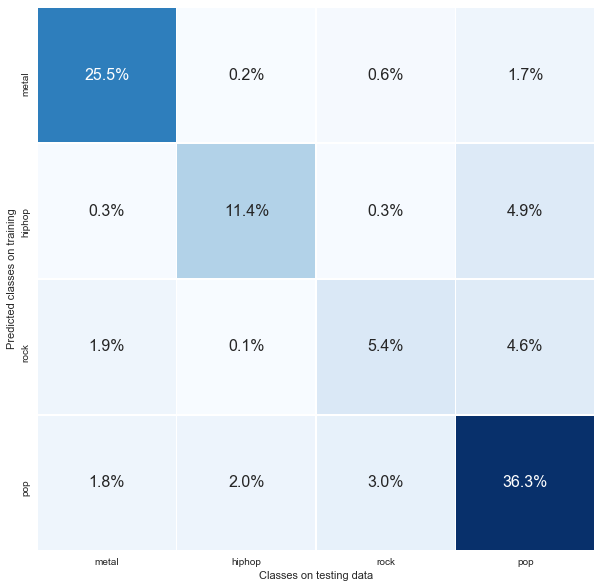

In [200]:
plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix(y_test,y_hat)/len(y_test),
            annot=True,
            xticklabels=target_label,
            yticklabels=target_label,
            cbar=False,linewidths=.5,
            annot_kws={"fontsize":16},
            fmt='.1%',#'d'
            cmap="Blues")
plt.xlabel('Classes on testing data')
plt.ylabel('Predicted classes on training')

Se puede observar que la mayor cantidad de valores predichos de manera correcta se encuentran en el género pop y metal. Estos generos erán lo que tenían una menor frecuenca de palabras encontradas con la función vectorizer.

In [201]:
def plot_class_report(y_test, y_hat, classes_labels):

    plt.figure(figsize=(15, 10))
    tmp_report = classification_report(y_test, y_hat, output_dict=True)
    targets = list(classes_labels)
    targets.append('average')
    tmp_report = pd.DataFrame(tmp_report)\
                    .drop(columns=['weighted avg', 'macro avg'])
    tmp_report.columns = targets
    tmp_report = tmp_report.drop(labels='support')
    tmp_report = tmp_report.drop(columns='average')
    tmp_report = tmp_report.T

    for index, (colname, serie) in enumerate(tmp_report.iteritems()):
        plt.subplot(3, 1, index + 1)
        serie.plot(kind = 'barh')
        plt.title(f"Métrica: {colname}")
        plt.tight_layout()

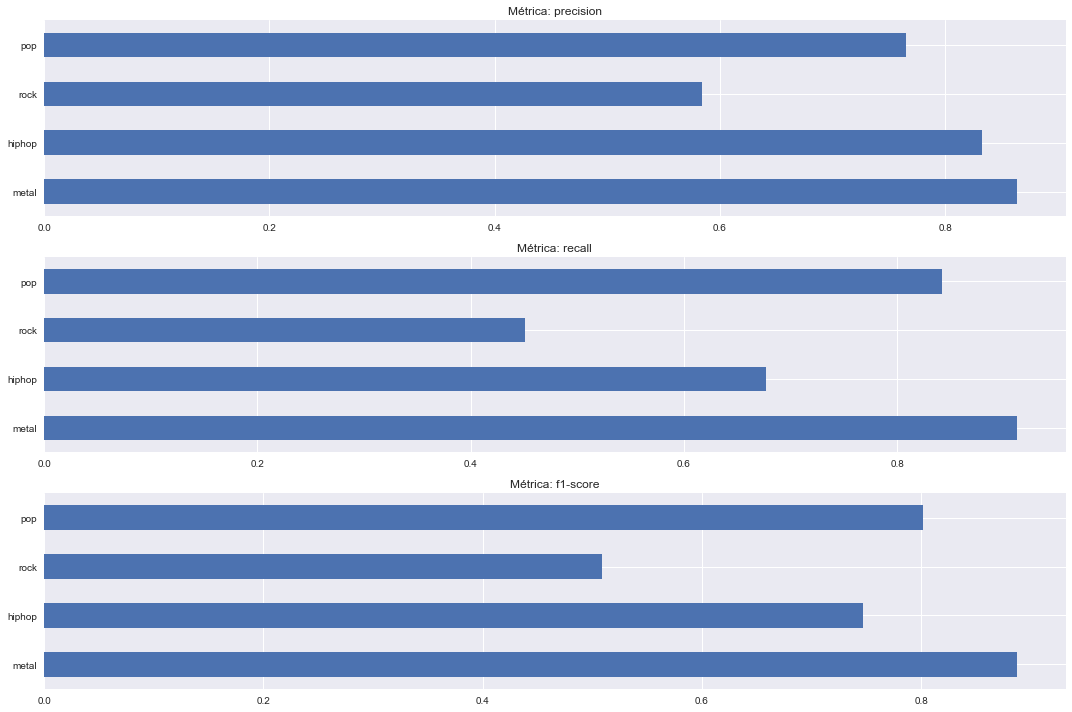

In [202]:
plot_class_report(y_test, y_hat, target_label)

En el caso de la presición, el genero metal fue predicho de manera correcta muchas más veces, respecto a las otras clases. Esto nos indica que las predicciones realizadas fueron efectivamente positivas teniendo encuenta, respecto al total de prediciones realizadas al género, es decir tanto correctas como incorrectas (predicciones que pertenencen a otros géneros musicales atribuidas como metal).

Para de la sensibilidad, también el mejor desempeño del modelo fue para el genero metal. Esto significa que se consideraron las veces en que el modelo falló al detectar el género (que no identifico metal cuando efectivamente era de esta clase). Para este caso, esta métrica también es favorable. 

Para el caso de F1, se confirma que el mejor desempeño del modelo es para el género metal, seguido de pop. Esta métrica es robusta inclusive con un desbalance de clases.

## 5. Mejora del Modelo

Para este caso, sería bueno utilizar una técnica de undersampling, debido al desbalance que presenta la clase rock. Hay que considerar que muchos valores se repiten (palabras idénticas) entre los géneros rock y pop. Al balancear las clases, es muy probable que se mejore considerablemente la predicción de los valores asociados a la clase pop.